In [2]:
import pandas as pd

In [4]:
df=pd.read_excel(r"D:\VIT\LTI, Dataengineering\Dataset\India_IT_Skills_Dataset_1500_Records.xlsx")

In [5]:
df.head(10)

,Region,Skill,Number of People,Average Experience (Years),Average Salary (INR Lakhs)
0,East,Software Testing,192,13.6,19.35
1,South,Cybersecurity,934,5.9,10.29
2,North,AI & ML,625,11.4,14.64
3,South,Cybersecurity,777,5.3,18.41
4,North,Data Science,846,11.0,14.44
5,North-East,Software Testing,851,12.0,19.99
6,West,Data Science,666,8.5,24.28
7,West,AI & ML,22,9.7,18.32
8,North-East,Cloud Computing,738,6.5,23.85
9,Central,Blockchain,794,7.7,11.63


In [7]:
df.describe()

,Number of People,Average Experience (Years),Average Salary (INR Lakhs)
count,1500.000000,1500.000000,1500.000000
mean,504.427333,8.044133,13.419533
std,284.022675,4.015188,6.432979
min,10.000000,1.000000,2.000000
25%,263.750000,4.700000,7.920000
50%,503.000000,8.100000,13.600000
75%,755.000000,11.525000,18.692500
max,1000.000000,15.000000,24.970000


In [9]:
df.shape

(1500, 5)

In [10]:
df.describe

<bound method NDFrame.describe of        Region             Skill  Number of People  Average Experience (Years)  \
0        East  Software Testing               192                        13.6   
1       South     Cybersecurity               934                         5.9   
2       North           AI & ML               625                        11.4   
3       South     Cybersecurity               777                         5.3   
4       North      Data Science               846                        11.0   
...       ...               ...               ...                         ...   
1495     East               IoT               431                         6.1   
1496    North  Software Testing               223                         7.4   
1497     West   Cloud Computing               275                         8.4   
1498  Central  Software Testing               766                        11.2   
1499    South  Software Testing               695                         1

In [12]:
df.dtypes

Region                         object
Skill                          object
Number of People                int64
Average Experience (Years)    float64
Average Salary (INR Lakhs)    float64
dtype: object

In [13]:
# Summary Profile
profile = {
    'Data Types': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Basic Statistics': df.describe(include='all')
}

# Display profile
print("Data Types:\n", profile['Data Types'])
print("\nMissing Values:\n", profile['Missing Values'])
print("\nBasic Statistics:\n", profile['Basic Statistics'])

Data Types:
 Region                         object
Skill                          object
Number of People                int64
Average Experience (Years)    float64
Average Salary (INR Lakhs)    float64
dtype: object

Missing Values:
 Region                        0
Skill                         0
Number of People              0
Average Experience (Years)    0
Average Salary (INR Lakhs)    0
dtype: int64

Basic Statistics:
        Region             Skill  Number of People  Average Experience (Years)  \
count    1500              1500       1500.000000                 1500.000000   
unique      6                10               NaN                         NaN   
top      East  Software Testing               NaN                         NaN   
freq      270               173               NaN                         NaN   
mean      NaN               NaN        504.427333                    8.044133   
std       NaN               NaN        284.022675                    4.015188   
min  

In [14]:
#checking for missing values
df.isnull().sum()

Region                        0
Skill                         0
Number of People              0
Average Experience (Years)    0
Average Salary (INR Lakhs)    0
dtype: int64

In [16]:
df["Region"].unique()

array(['East', 'South', 'North', 'North-East', 'West', 'Central'],
      dtype=object)

In [23]:
#checking for duplicate values
df_duplicates=df.duplicated()

In [25]:
df_duplicates.sum()

0

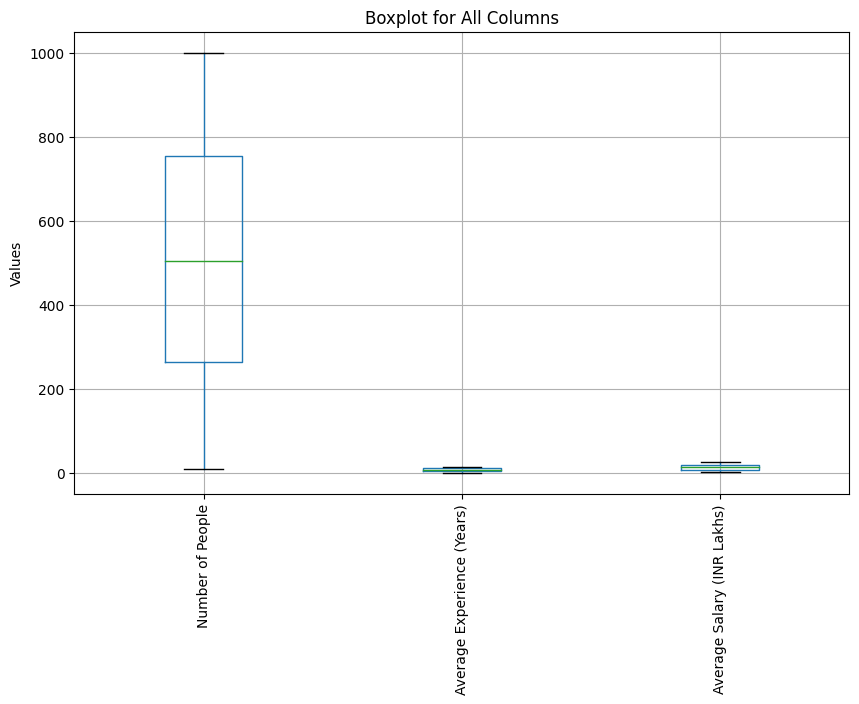

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Adjust the size as needed
df.boxplot()

# Add title and labels
plt.title("Boxplot for All Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
from pandas_profiling import ProfileReport



C:\Users\Abhay\AppData\Local\Temp\ipykernel_73180\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [43]:
# Generate the profile report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [44]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
#Count the Occurrences of Each Skill by Region
# Group by region and skill, counting occurrences of each skill in each region
skill_distribution = df.groupby(['Region', 'Skill']).size().reset_index(name='Count')

# Preview the grouped data
print(skill_distribution.head())


    Region            Skill  Count
0  Central          AI & ML     25
1  Central       Blockchain     30
2  Central  Cloud Computing     27
3  Central    Cybersecurity     20
4  Central     Data Science     27


In [47]:
# Pivot the data for easier visualization
skill_pivot = skill_distribution.pivot(index='Region', columns='Skill', values='Count').fillna(0)

# Preview the pivoted data
print(skill_pivot.head())


Skill       AI & ML  Blockchain  Cloud Computing  Cybersecurity  Data Science  \
Region                                                                          
Central          25          30               27             20            27   
East             27          26               26             30            24   
North            24          25               27             24            18   
North-East       29          22               30             21            25   
South            23          23               22             23            23   

Skill       DevOps  IoT  Mobile App Development  Software Testing  \
Region                                                              
Central         29   15                      26                21   
East            25   22                      35                39   
North           17   21                      28                28   
North-East      27   23                      24                25   
South           20

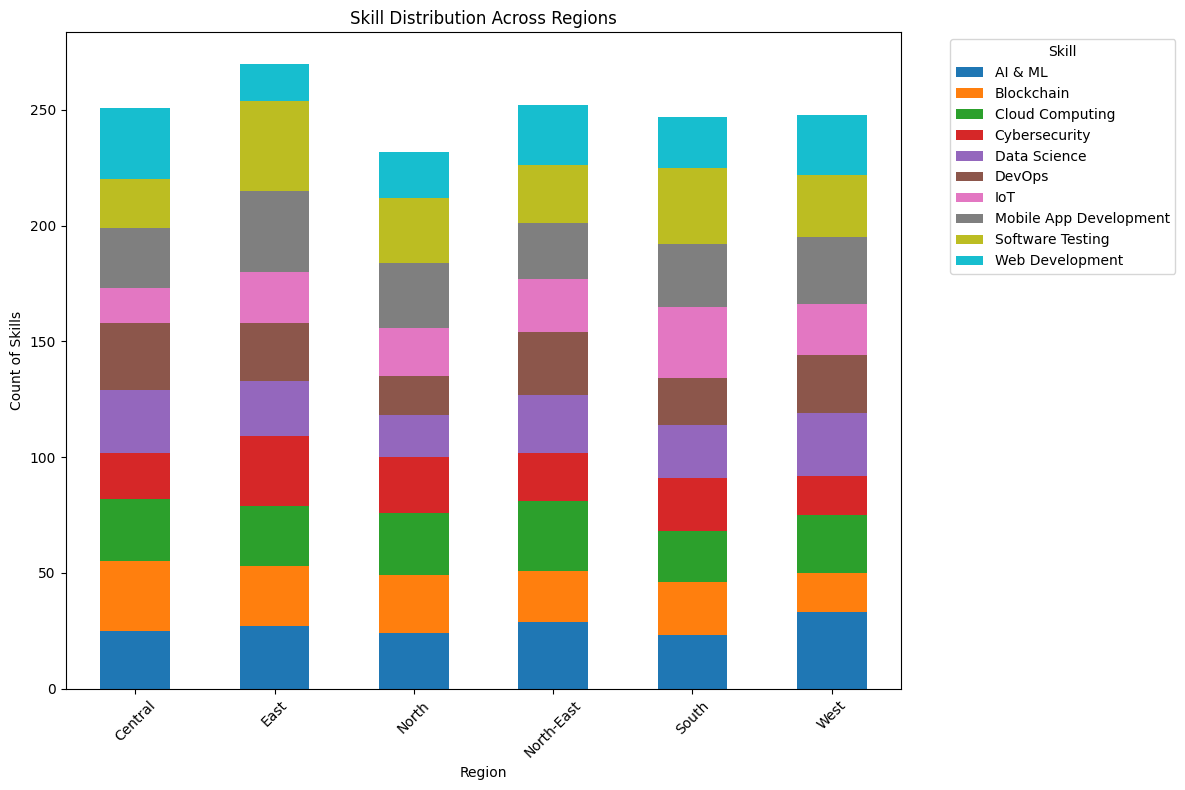

In [48]:
import matplotlib.pyplot as plt

# Plot a stacked bar chart
skill_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Skill Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Count of Skills')
plt.xticks(rotation=45)
plt.legend(title='Skill', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


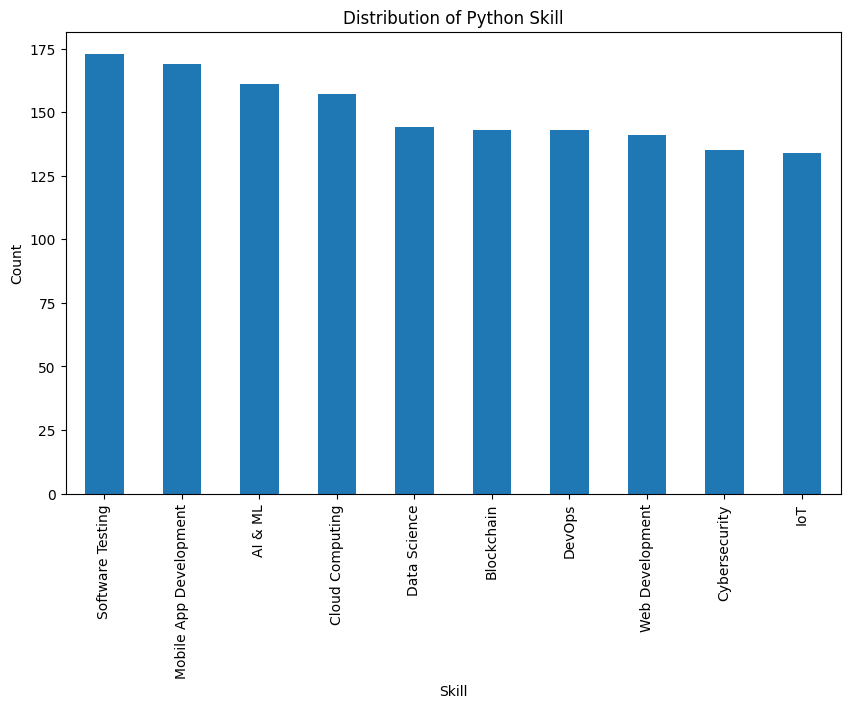

In [49]:
# Histogram for the distribution of a specific skill, e.g., "Python"
df['Skill'].value_counts().plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Distribution of Python Skill')
plt.xlabel('Skill')
plt.ylabel('Count')

# Show the plot
plt.show()


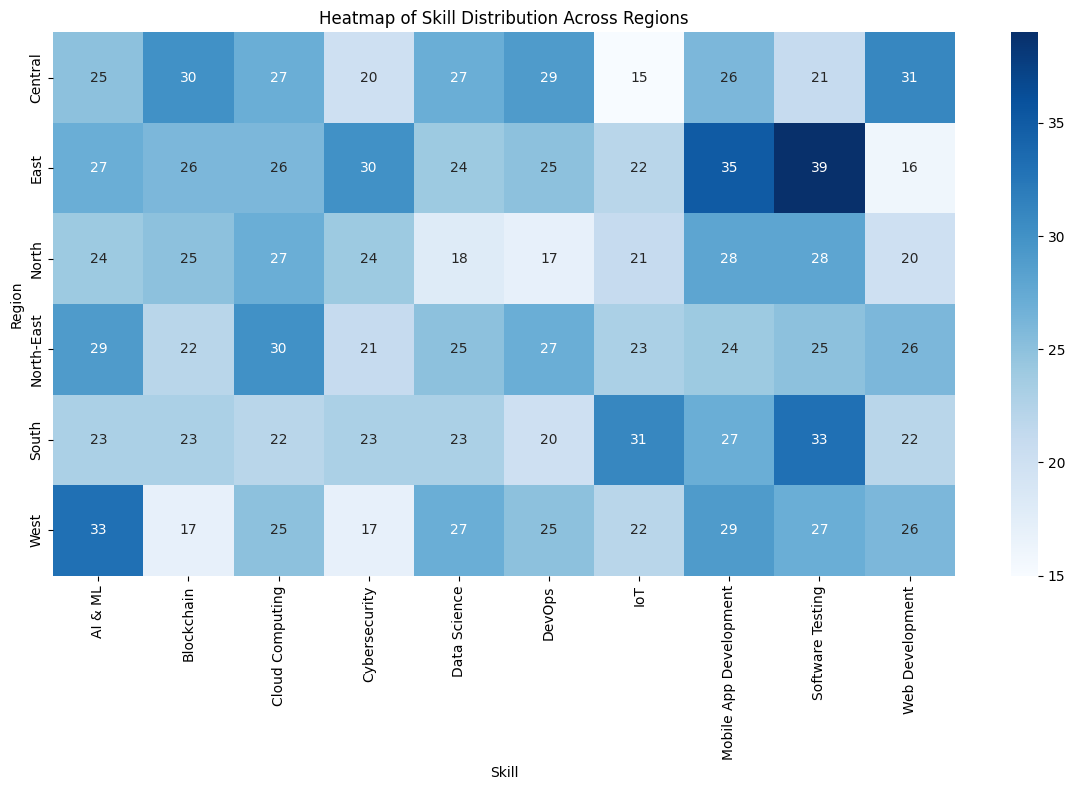

In [50]:
import seaborn as sns

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(skill_pivot, annot=True, cmap='Blues', fmt="g", cbar=True)

# Add title
plt.title('Heatmap of Skill Distribution Across Regions')
plt.ylabel('Region')
plt.xlabel('Skill')

# Show the plot
plt.tight_layout()
plt.show()


In [54]:
# Assuming the dataset has a 'skills' column listing skills of individuals
skill_count = df['Skill'].value_counts()

# Display the top skills with the highest counts
print(skill_count.head())


Skill
Software Testing          173
Mobile App Development    169
AI & ML                   161
Cloud Computing           157
Data Science              144
Name: count, dtype: int64


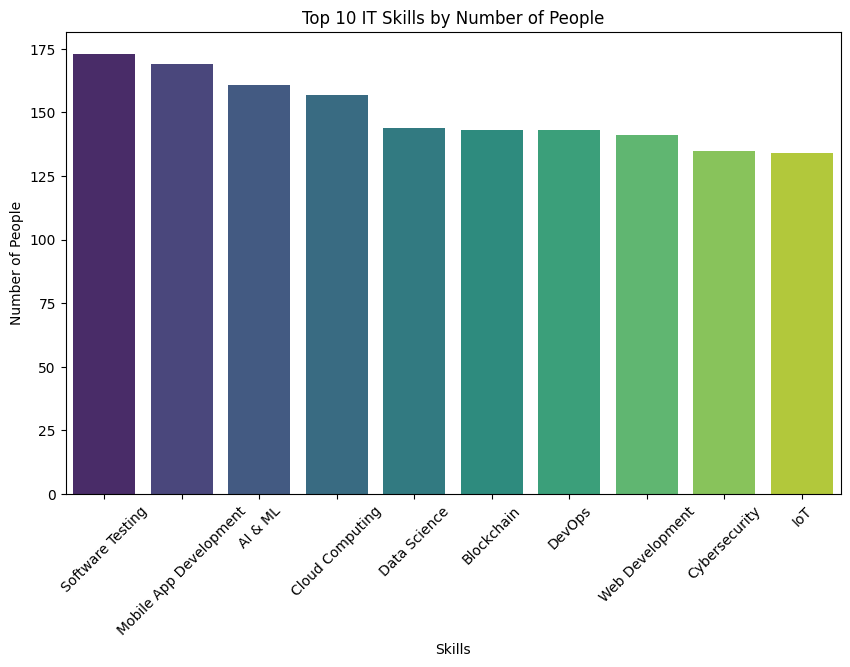

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top skills by count
top_skills = skill_count.head(10)  # Get the top 10 most common skills
plt.figure(figsize=(10, 6))
sns.barplot(x=top_skills.index, y=top_skills.values, palette='viridis')
plt.title('Top 10 IT Skills by Number of People')
plt.xlabel('Skills')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()


In [60]:
# Group the dataset by 'skill' and calculate the average salary for each skill
average_salary_by_skill = df.groupby('Skill')['Average Salary (INR Lakhs)'].mean()

# Display the result
print(average_salary_by_skill)


Skill
AI & ML                   13.639068
Blockchain                13.267413
Cloud Computing           13.269936
Cybersecurity             13.186741
Data Science              13.096319
DevOps                    13.644615
IoT                       13.065224
Mobile App Development    14.020592
Software Testing          13.088786
Web Development           13.836525
Name: Average Salary (INR Lakhs), dtype: float64


In [61]:
# Sort the skills by average salary in descending order
sorted_salary_by_skill = average_salary_by_skill.sort_values(ascending=False)

# Display the sorted results
print(sorted_salary_by_skill)


Skill
Mobile App Development    14.020592
Web Development           13.836525
DevOps                    13.644615
AI & ML                   13.639068
Cloud Computing           13.269936
Blockchain                13.267413
Cybersecurity             13.186741
Data Science              13.096319
Software Testing          13.088786
IoT                       13.065224
Name: Average Salary (INR Lakhs), dtype: float64


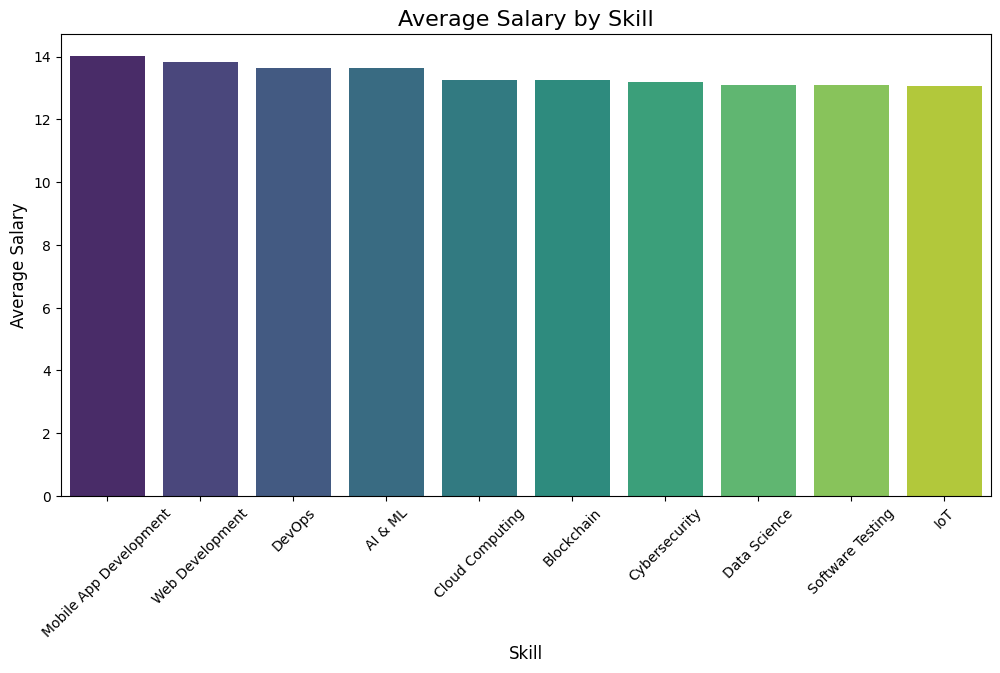

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot size and style
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_salary_by_skill.index, y=sorted_salary_by_skill.values, palette='viridis')

# Add titles and labels
plt.title('Average Salary by Skill', fontsize=16)
plt.xlabel('Skill', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45)  # Rotate skill names for better readability

# Display the plot
plt.show()


In [65]:
# Median salary by skill
median_salary_by_skill = df.groupby('Skill')['Average Salary (INR Lakhs)'].median()
print(median_salary_by_skill)

# Average salary by experience level
average_salary_by_experience = df.groupby('Average Experience (Years)')['Average Salary (INR Lakhs)'].mean()
print(average_salary_by_experience)


Skill
AI & ML                   14.600
Blockchain                12.560
Cloud Computing           13.950
Cybersecurity             12.690
Data Science              13.165
DevOps                    14.440
IoT                       12.325
Mobile App Development    13.820
Software Testing          13.460
Web Development           13.990
Name: Average Salary (INR Lakhs), dtype: float64
Average Experience (Years)
1.0     18.825000
1.1     14.291111
1.2     12.690000
1.3     10.790000
1.4     17.161250
          ...    
14.6    15.707778
14.7    11.210000
14.8    13.847692
14.9    15.752857
15.0    15.182727
Name: Average Salary (INR Lakhs), Length: 141, dtype: float64


In [67]:


# For categorical columns, fill missing values with the mode
df['Skill'] = df['Skill'].fillna(df['Skill'].mode()[0])


In [68]:
df['Skill'] = df['Skill'].str.lower()  # Convert all skills to lowercase


In [71]:
df['salary_range'] = pd.cut(df['Average Experience (Years)'], bins=[0, 5, 10, 15, 20], 
                            labels=['Low', 'Medium', 'High', 'Very High'])


In [72]:
df.head(10)

,Region,Skill,Number of People,Average Experience (Years),Average Salary (INR Lakhs),salary_range
0,East,software testing,192,13.6,19.35,High
1,South,cybersecurity,934,5.9,10.29,Medium
2,North,ai & ml,625,11.4,14.64,High
3,South,cybersecurity,777,5.3,18.41,Medium
4,North,data science,846,11.0,14.44,High
5,North-East,software testing,851,12.0,19.99,High
6,West,data science,666,8.5,24.28,Medium
7,West,ai & ml,22,9.7,18.32,Medium
8,North-East,cloud computing,738,6.5,23.85,Medium
9,Central,blockchain,794,7.7,11.63,Medium


In [73]:
df['experience_level'] = pd.cut(df['Average Experience (Years)'], bins=[0, 3, 7, 15, 30], 
                                labels=['Junior', 'Mid-level', 'Senior', 'Expert'])


In [74]:
df.head(10)

,Region,Skill,Number of People,Average Experience (Years),Average Salary (INR Lakhs),salary_range,experience_level
0,East,software testing,192,13.6,19.35,High,Senior
1,South,cybersecurity,934,5.9,10.29,Medium,Mid-level
2,North,ai & ml,625,11.4,14.64,High,Senior
3,South,cybersecurity,777,5.3,18.41,Medium,Mid-level
4,North,data science,846,11.0,14.44,High,Senior
5,North-East,software testing,851,12.0,19.99,High,Senior
6,West,data science,666,8.5,24.28,Medium,Senior
7,West,ai & ml,22,9.7,18.32,Medium,Senior
8,North-East,cloud computing,738,6.5,23.85,Medium,Mid-level
9,Central,blockchain,794,7.7,11.63,Medium,Senior


In [75]:
skill_counts = df['Skill'].value_counts()
df['skill_popularity'] = df['Skill'].map(skill_counts)


In [76]:
df

,Region,Skill,Number of People,Average Experience (Years),Average Salary (INR Lakhs),salary_range,experience_level,skill_popularity
0,East,software testing,192,13.6,19.35,High,Senior,173
1,South,cybersecurity,934,5.9,10.29,Medium,Mid-level,135
2,North,ai & ml,625,11.4,14.64,High,Senior,161
3,South,cybersecurity,777,5.3,18.41,Medium,Mid-level,135
4,North,data science,846,11.0,14.44,High,Senior,144
...,...,...,...,...,...,...,...,...
1495,East,iot,431,6.1,13.12,Medium,Mid-level,134
1496,North,software testing,223,7.4,8.31,Medium,Senior,173
1497,West,cloud computing,275,8.4,12.87,Medium,Senior,157
1498,Central,software testing,766,11.2,23.65,High,Senior,173


In [77]:
region_avg_salary = df.groupby('Region')['Average Experience (Years)'].transform('mean')
df['region_avg_salary'] = region_avg_salary


In [78]:
df.head(10)

,Region,Skill,Number of People,Average Experience (Years),Average Salary (INR Lakhs),salary_range,experience_level,skill_popularity,region_avg_salary
0,East,software testing,192,13.6,19.35,High,Senior,173,8.363333
1,South,cybersecurity,934,5.9,10.29,Medium,Mid-level,135,7.894332
2,North,ai & ml,625,11.4,14.64,High,Senior,161,8.082759
3,South,cybersecurity,777,5.3,18.41,Medium,Mid-level,135,7.894332
4,North,data science,846,11.0,14.44,High,Senior,144,8.082759
5,North-East,software testing,851,12.0,19.99,High,Senior,173,7.901587
6,West,data science,666,8.5,24.28,Medium,Senior,144,7.896774
7,West,ai & ml,22,9.7,18.32,Medium,Senior,161,7.896774
8,North-East,cloud computing,738,6.5,23.85,Medium,Mid-level,157,7.901587
9,Central,blockchain,794,7.7,11.63,Medium,Senior,143,8.101195


In [81]:
df['skill_count'] = df['Skill'].apply(lambda x: len(x.split(',')))  # Assuming skills are comma-separated
df['salary_per_skill'] = df['Average Experience (Years)'] / df['skill_count']


In [82]:
df.head(10)

,Region,Skill,Number of People,Average Experience (Years),Average Salary (INR Lakhs),salary_range,experience_level,skill_popularity,region_avg_salary,skill_count,salary_per_skill
0,East,software testing,192,13.6,19.35,High,Senior,173,8.363333,1,13.6
1,South,cybersecurity,934,5.9,10.29,Medium,Mid-level,135,7.894332,1,5.9
2,North,ai & ml,625,11.4,14.64,High,Senior,161,8.082759,1,11.4
3,South,cybersecurity,777,5.3,18.41,Medium,Mid-level,135,7.894332,1,5.3
4,North,data science,846,11.0,14.44,High,Senior,144,8.082759,1,11.0
5,North-East,software testing,851,12.0,19.99,High,Senior,173,7.901587,1,12.0
6,West,data science,666,8.5,24.28,Medium,Senior,144,7.896774,1,8.5
7,West,ai & ml,22,9.7,18.32,Medium,Senior,161,7.896774,1,9.7
8,North-East,cloud computing,738,6.5,23.85,Medium,Mid-level,157,7.901587,1,6.5
9,Central,blockchain,794,7.7,11.63,Medium,Senior,143,8.101195,1,7.7


In [83]:
df['exp_to_skill_ratio'] = df['Average Experience (Years)'] / df['skill_count']


In [84]:
df.head(10)

,Region,Skill,Number of People,Average Experience (Years),Average Salary (INR Lakhs),salary_range,experience_level,skill_popularity,region_avg_salary,skill_count,salary_per_skill,exp_to_skill_ratio
0,East,software testing,192,13.6,19.35,High,Senior,173,8.363333,1,13.6,13.6
1,South,cybersecurity,934,5.9,10.29,Medium,Mid-level,135,7.894332,1,5.9,5.9
2,North,ai & ml,625,11.4,14.64,High,Senior,161,8.082759,1,11.4,11.4
3,South,cybersecurity,777,5.3,18.41,Medium,Mid-level,135,7.894332,1,5.3,5.3
4,North,data science,846,11.0,14.44,High,Senior,144,8.082759,1,11.0,11.0
5,North-East,software testing,851,12.0,19.99,High,Senior,173,7.901587,1,12.0,12.0
6,West,data science,666,8.5,24.28,Medium,Senior,144,7.896774,1,8.5,8.5
7,West,ai & ml,22,9.7,18.32,Medium,Senior,161,7.896774,1,9.7,9.7
8,North-East,cloud computing,738,6.5,23.85,Medium,Mid-level,157,7.901587,1,6.5,6.5
9,Central,blockchain,794,7.7,11.63,Medium,Senior,143,8.101195,1,7.7,7.7
